# Are B1 buses late?

In [116]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#%matplotlib notebook

from matplotlib import animation, rc
from IPython.display import HTML
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings('ignore')


In [117]:
realtime = pd.read_csv('realtime.csv')
realtime = realtime[realtime['start_date'] == 20190601]
stop_locations = pd.read_csv('stops.txt')
#vehicle = pd.read_csv('vehicle.csv')

# Trips
The available data provides delay for arrival and departure at each stop, along with the timestamp of the measurment

In [118]:
realtime = realtime.sort_values(by=['trip_id','stop_sequence','timestamp'])
realtime.drop_duplicates(subset=['trip_id','stop_id'],keep='last',inplace=True)
realtime.reset_index(inplace=True,drop=True)
realtime.head()

,trip_id,start_time,start_date,schedule_relationship,route_id,stop_sequence,stop_arrival_delay,stop_arrival_time,stop_departure_delay,stop_departure_time,stop_id,timestamp
0,595358,00:07:00,20190601,0.0,2440_B1,1.0,0.0,1.559312e+09,0.0,1.559312e+09,200023,1.559311e+09
1,595358,00:07:00,20190601,0.0,2440_B1,2.0,-28.0,1.559312e+09,21.0,1.559312e+09,208948,1.559312e+09
2,595358,00:07:00,20190601,0.0,2440_B1,3.0,-37.0,1.559312e+09,-3.0,1.559312e+09,2088180,1.559312e+09
3,595358,00:07:00,20190601,0.0,2440_B1,4.0,-30.0,1.559313e+09,4.0,1.559313e+09,209326,1.559313e+09
4,595358,00:07:00,20190601,0.0,2440_B1,5.0,-16.0,1.559313e+09,32.0,1.559313e+09,210012,1.559313e+09


# Stops
Extract the stop location information.

In [119]:
stop_locations.drop(['location_type','parent_station'],axis=1, inplace=True)

# Rename the labels for readability
stop_locations['stop_name'][stop_locations['stop_name'] == 'Wynyard Station, Carrington St, Stand B'] = 'Wynyard'
stop_locations['stop_name'][stop_locations['stop_name'] == 'Neutral Bay Junction, Military Rd, Stand E'] = 'Neutral Bay Junction'
stop_locations['stop_name'][stop_locations['stop_name'] == 'Spit Junction B-Line, Spit Rd'] = 'Spit Junction'
stop_locations['stop_name'][stop_locations['stop_name'] == 'Manly Vale B-Line, Condamine St'] = 'Manly Vale'
stop_locations['stop_name'][stop_locations['stop_name'] == 'Warringah Mall, Pittwater Rd, Stand C'] = 'Warringah Mall'
stop_locations['stop_name'][stop_locations['stop_name'] == 'Dee Why B-Line, Pittwater Rd'] = 'Dee Why'
stop_locations['stop_name'][stop_locations['stop_name'] == 'Collaroy B-Line, Pittwater Rd'] = 'Collaroy'
stop_locations['stop_name'][stop_locations['stop_name'] == 'Narrabeen B-Line, Pittwater Rd'] = 'Narrabeen'
stop_locations['stop_name'][stop_locations['stop_name'] == 'Warriewood B-Line, Pittwater Rd'] = 'Warriewood'
stop_locations['stop_name'][stop_locations['stop_name'] == 'Mona Vale B-Line, Barrenjoey Rd'] = 'Mona Vale'



stop_locations.head()

,stop_id,stop_name,stop_lat,stop_lon,wheelchair_boarding
0,20002,"Circular Quay, Alfred St, Stand B",-33.861592,151.211932,0
1,20652,"Greenwich Point Wharf, Lower Serpentine Rd",-33.841786,151.181019,0
2,21051,"HolmePort Marina, McCarrs Creek Rd",-33.645897,151.281477,0
3,21373,"Bayview Park, Burwood Rd",-33.857865,151.120692,0
4,21721,Boronia Dr opp Lomandra Ct,-33.962900,150.978100,0


Combine these DataFrame's to link the delays to each stop.

In [120]:
data = realtime.merge(stop_locations,on='stop_id',how='left')

In [121]:
# List of Northbound stops
stoplist = [200023,  208948, 2088180,  209326,  210012,  209913,  209717, 210115,  210120,  210323]
data = data[data['stop_id'].isin(stoplist)]

data.head()


,trip_id,start_time,start_date,schedule_relationship,route_id,stop_sequence,stop_arrival_delay,stop_arrival_time,stop_departure_delay,stop_departure_time,stop_id,timestamp,stop_name,stop_lat,stop_lon,wheelchair_boarding
0,595358,00:07:00,20190601,0.0,2440_B1,1.0,0.0,1.559312e+09,0.0,1.559312e+09,200023,1.559311e+09,Wynyard,-33.865836,151.206298,0
1,595358,00:07:00,20190601,0.0,2440_B1,2.0,-28.0,1.559312e+09,21.0,1.559312e+09,208948,1.559312e+09,Neutral Bay Junction,-33.831205,151.221720,0
2,595358,00:07:00,20190601,0.0,2440_B1,3.0,-37.0,1.559312e+09,-3.0,1.559312e+09,2088180,1.559312e+09,Spit Junction,-33.824006,151.241476,0
3,595358,00:07:00,20190601,0.0,2440_B1,4.0,-30.0,1.559313e+09,4.0,1.559313e+09,209326,1.559313e+09,Manly Vale,-33.786134,151.266627,0
4,595358,00:07:00,20190601,0.0,2440_B1,5.0,-16.0,1.559313e+09,32.0,1.559313e+09,210012,1.559313e+09,Warringah Mall,-33.767105,151.268702,0


# Average delay for each stop (northbound)
The average delay for Saturday at each stop.

In [122]:
arrival_delay = data.groupby(by='stop_id')['stop_arrival_delay'].mean()
departure_delay = data.groupby(by='stop_id')['stop_departure_delay'].mean()

df = pd.concat([arrival_delay, departure_delay,], axis=1)
df.reset_index(inplace=True)
df.columns = ['Stop_id','Arrival_delay', 'Departure_delay']
delay = df.merge(stop_locations,left_on='Stop_id',right_on='stop_id')
delay.head()



,Stop_id,Arrival_delay,Departure_delay,stop_id,stop_name,stop_lat,stop_lon,wheelchair_boarding
0,200023,0.962687,0.962687,200023,Wynyard,-33.865836,151.206298,0
1,208948,2.162963,51.837037,208948,Neutral Bay Junction,-33.831205,151.221720,0
2,209326,-31.837037,10.740741,209326,Manly Vale,-33.786134,151.266627,0
3,209717,-49.385246,5.327869,209717,Collaroy,-33.731679,151.300906,0
4,209913,-55.948148,31.844444,209913,Dee Why,-33.752637,151.286507,0


In [123]:
delay.head()

,Stop_id,Arrival_delay,Departure_delay,stop_id,stop_name,stop_lat,stop_lon,wheelchair_boarding
0,200023,0.962687,0.962687,200023,Wynyard,-33.865836,151.206298,0
1,208948,2.162963,51.837037,208948,Neutral Bay Junction,-33.831205,151.221720,0
2,209326,-31.837037,10.740741,209326,Manly Vale,-33.786134,151.266627,0
3,209717,-49.385246,5.327869,209717,Collaroy,-33.731679,151.300906,0
4,209913,-55.948148,31.844444,209913,Dee Why,-33.752637,151.286507,0


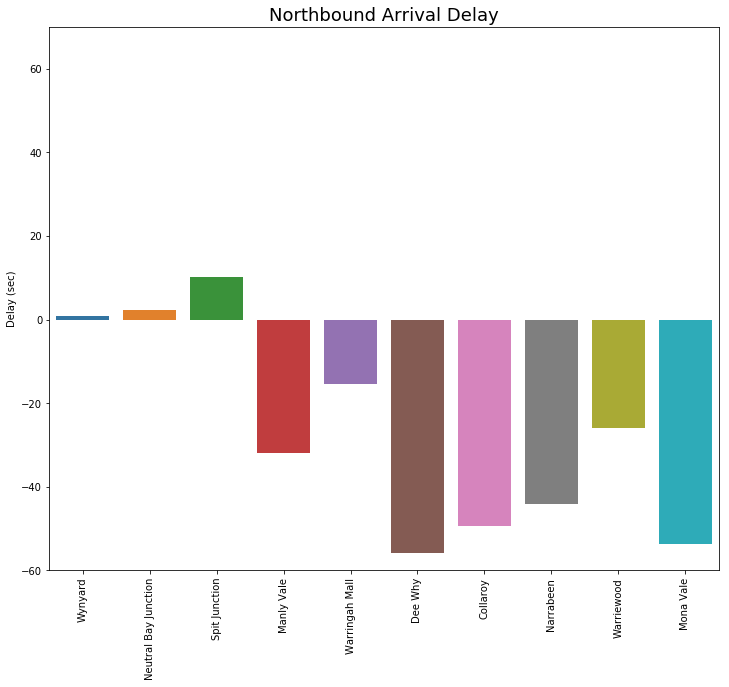

In [124]:
# Set the order of each stop
stop_order = ['Wynyard',
              'Neutral Bay Junction',
              'Spit Junction',
              'Manly Vale', 
              'Warringah Mall',
              'Dee Why',                     
              'Collaroy',
              'Narrabeen',   
              'Warriewood',   
              'Mona Vale']

fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x='stop_name',y='Arrival_delay',data=delay,ax=ax,order=stop_order)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Delay (sec)')
plt.ylim(-60,70)
plt.title('Northbound Arrival Delay',fontsize=18);



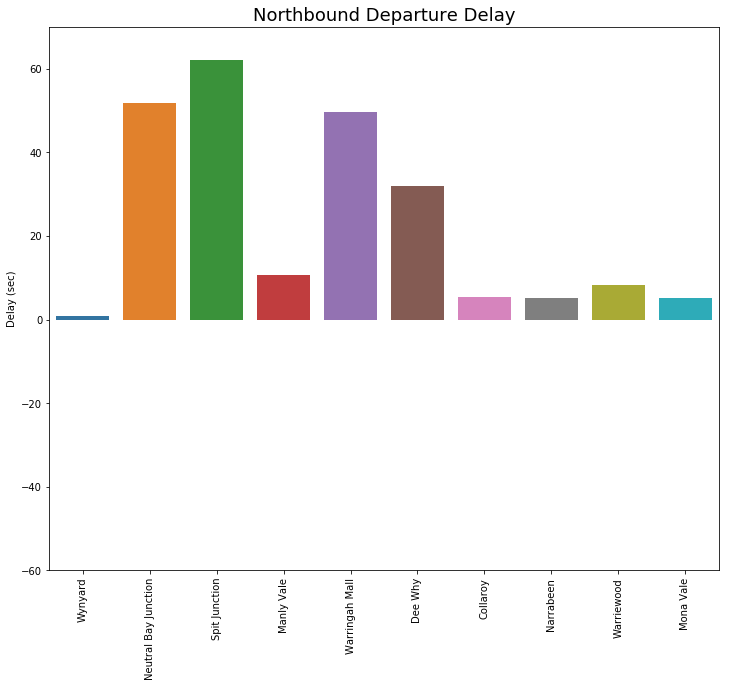

In [125]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x='stop_name',y='Departure_delay',data=delay,ax=ax,order=stop_order)
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Delay (sec)')
plt.ylim(-60,70)
plt.title('Northbound Departure Delay',fontsize=18);



On average, the B1 bus arrives at each stop early and departs late. The bus departs significantly late from Neutral Bay, Spit Junction and Warringah Mall. These stops are all major points with intersections, where people get off and go other directions, or pick up their cars.

The bus tends to arrive early at all stops from Manly Vale onwards.

# Distribution of delay across each stop

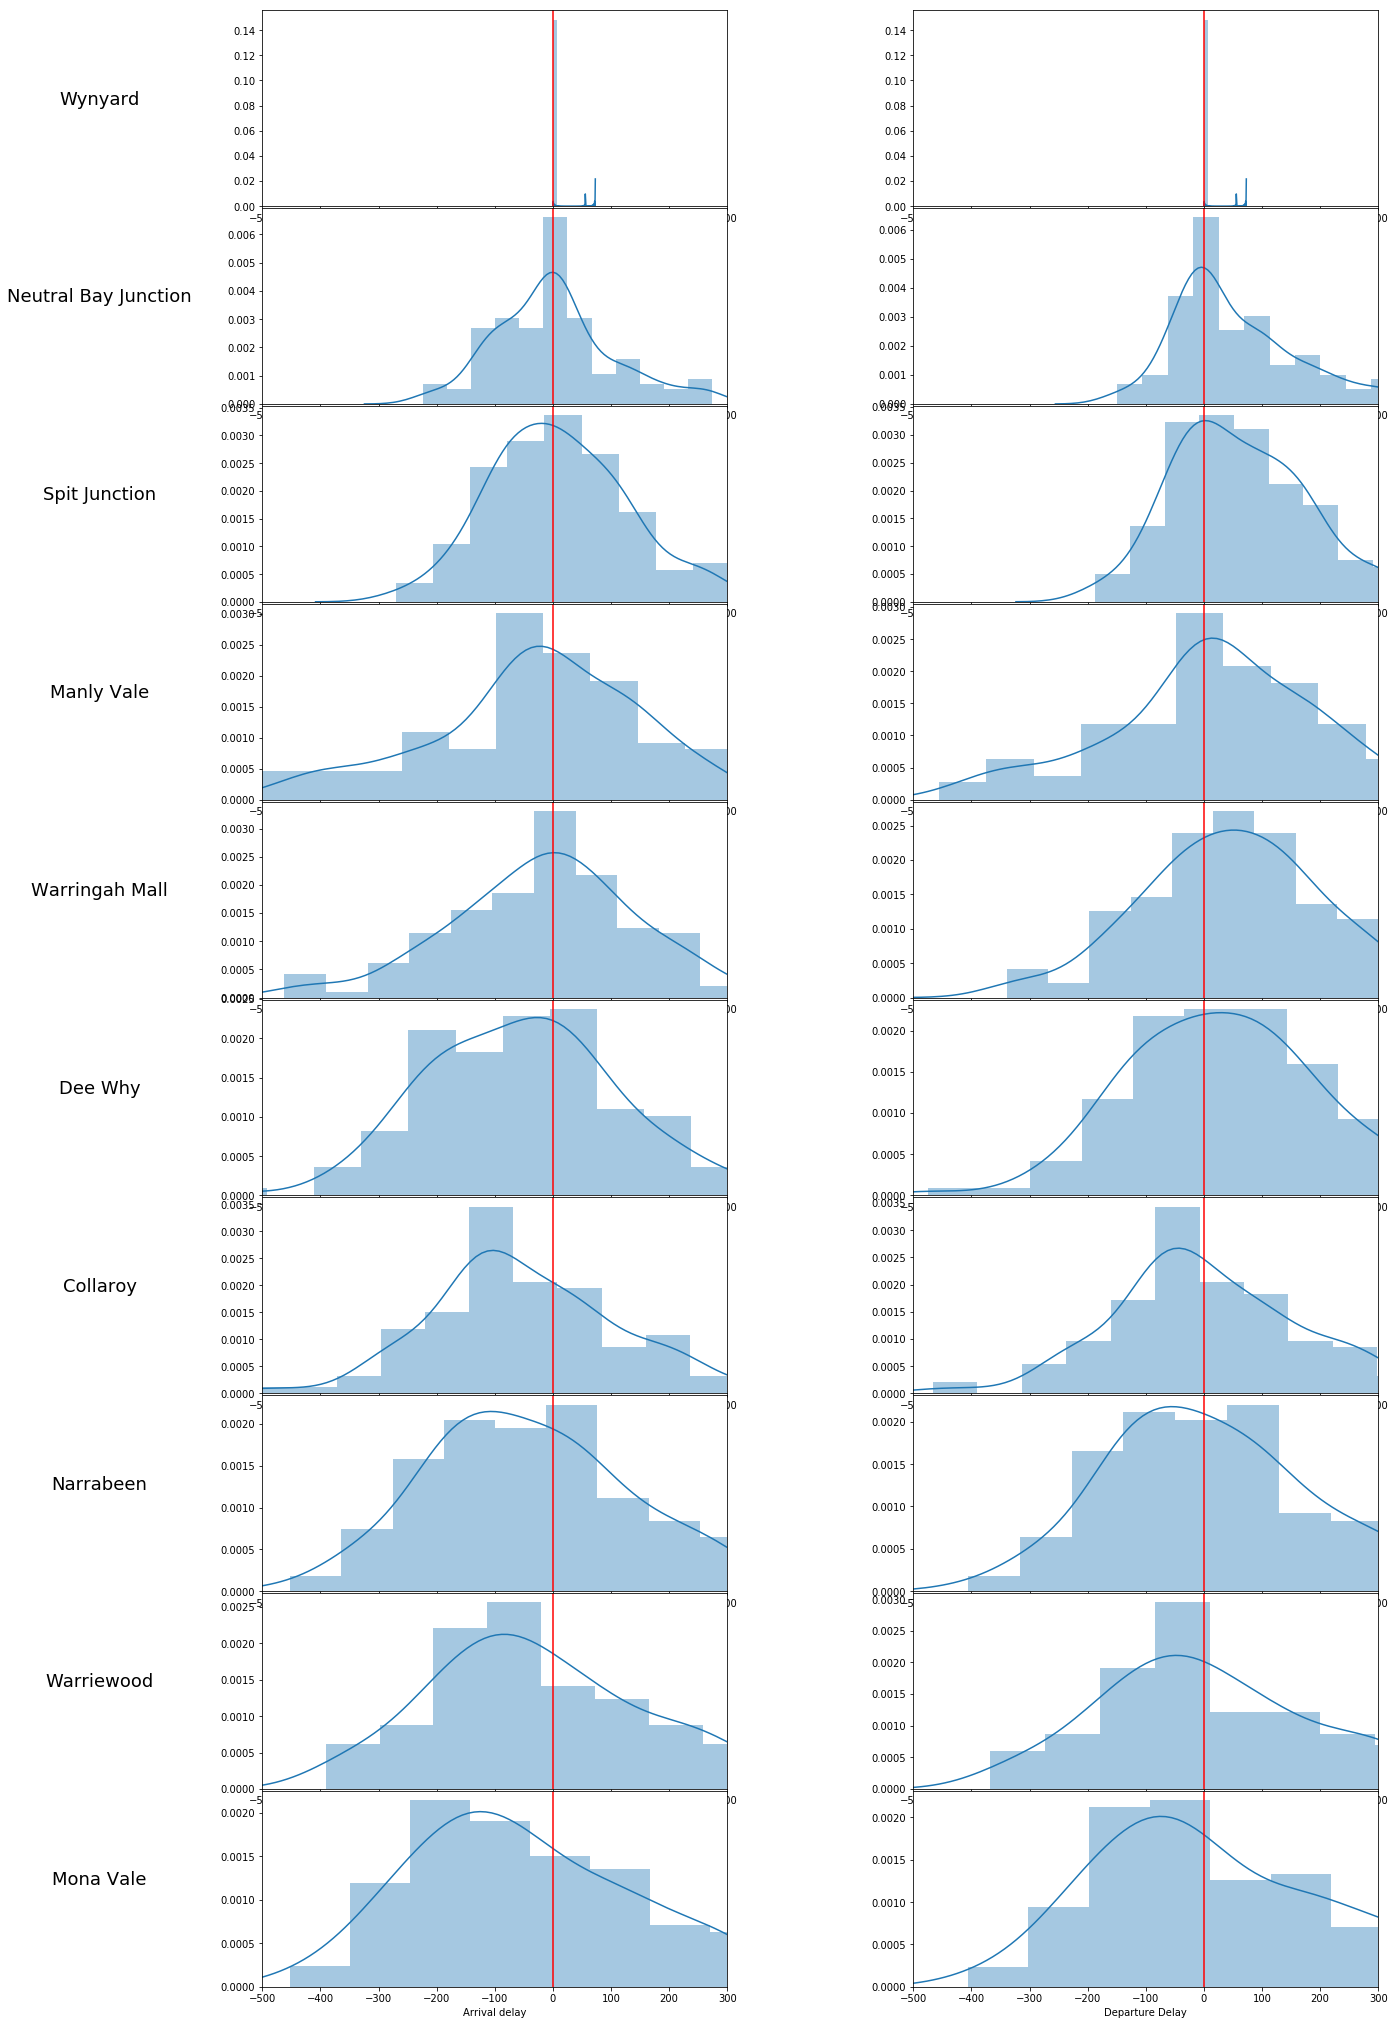

In [126]:

row = len(data['stop_id'].unique())+1
col = 2

fig = plt.figure(figsize=(20,40))
fig.subplots_adjust(hspace=0.01, wspace=0.4)
    
for idx, stop_id in enumerate(data['stop_id'].unique()):
    stop_id = data['stop_id'][data['stop_name'] == stop_order[idx]].iloc[0]
    ax = fig.add_subplot(row, col, idx*2+1)
    stop_data = data[data['stop_id'] == stop_id]
    sns.distplot(stop_data['stop_arrival_delay'])
    ax.axvline(x=0,color='red')
    h = ax.set_ylabel(stop_data.iloc[0]['stop_name'],fontsize=18)
    h.set_rotation(0)
    ax.set_xlabel('Arrival delay')
    ax.set_xlim(-500,300)
    ax.yaxis.set_label_coords(-0.35,.50)    

#     if (idx == 0):
#         ax.title.set_text('Arrival Delay')

    ax = fig.add_subplot(row, col, idx*2+2)
    sns.distplot(stop_data['stop_departure_delay'])
    ax.axvline(x=0,color='red')
    ax.set_xlabel('Departure Delay')
    ax.set_xlim(-500,300)
    

#     if (idx == 0):
#         ax.set_title('Departure Delay')
    
    

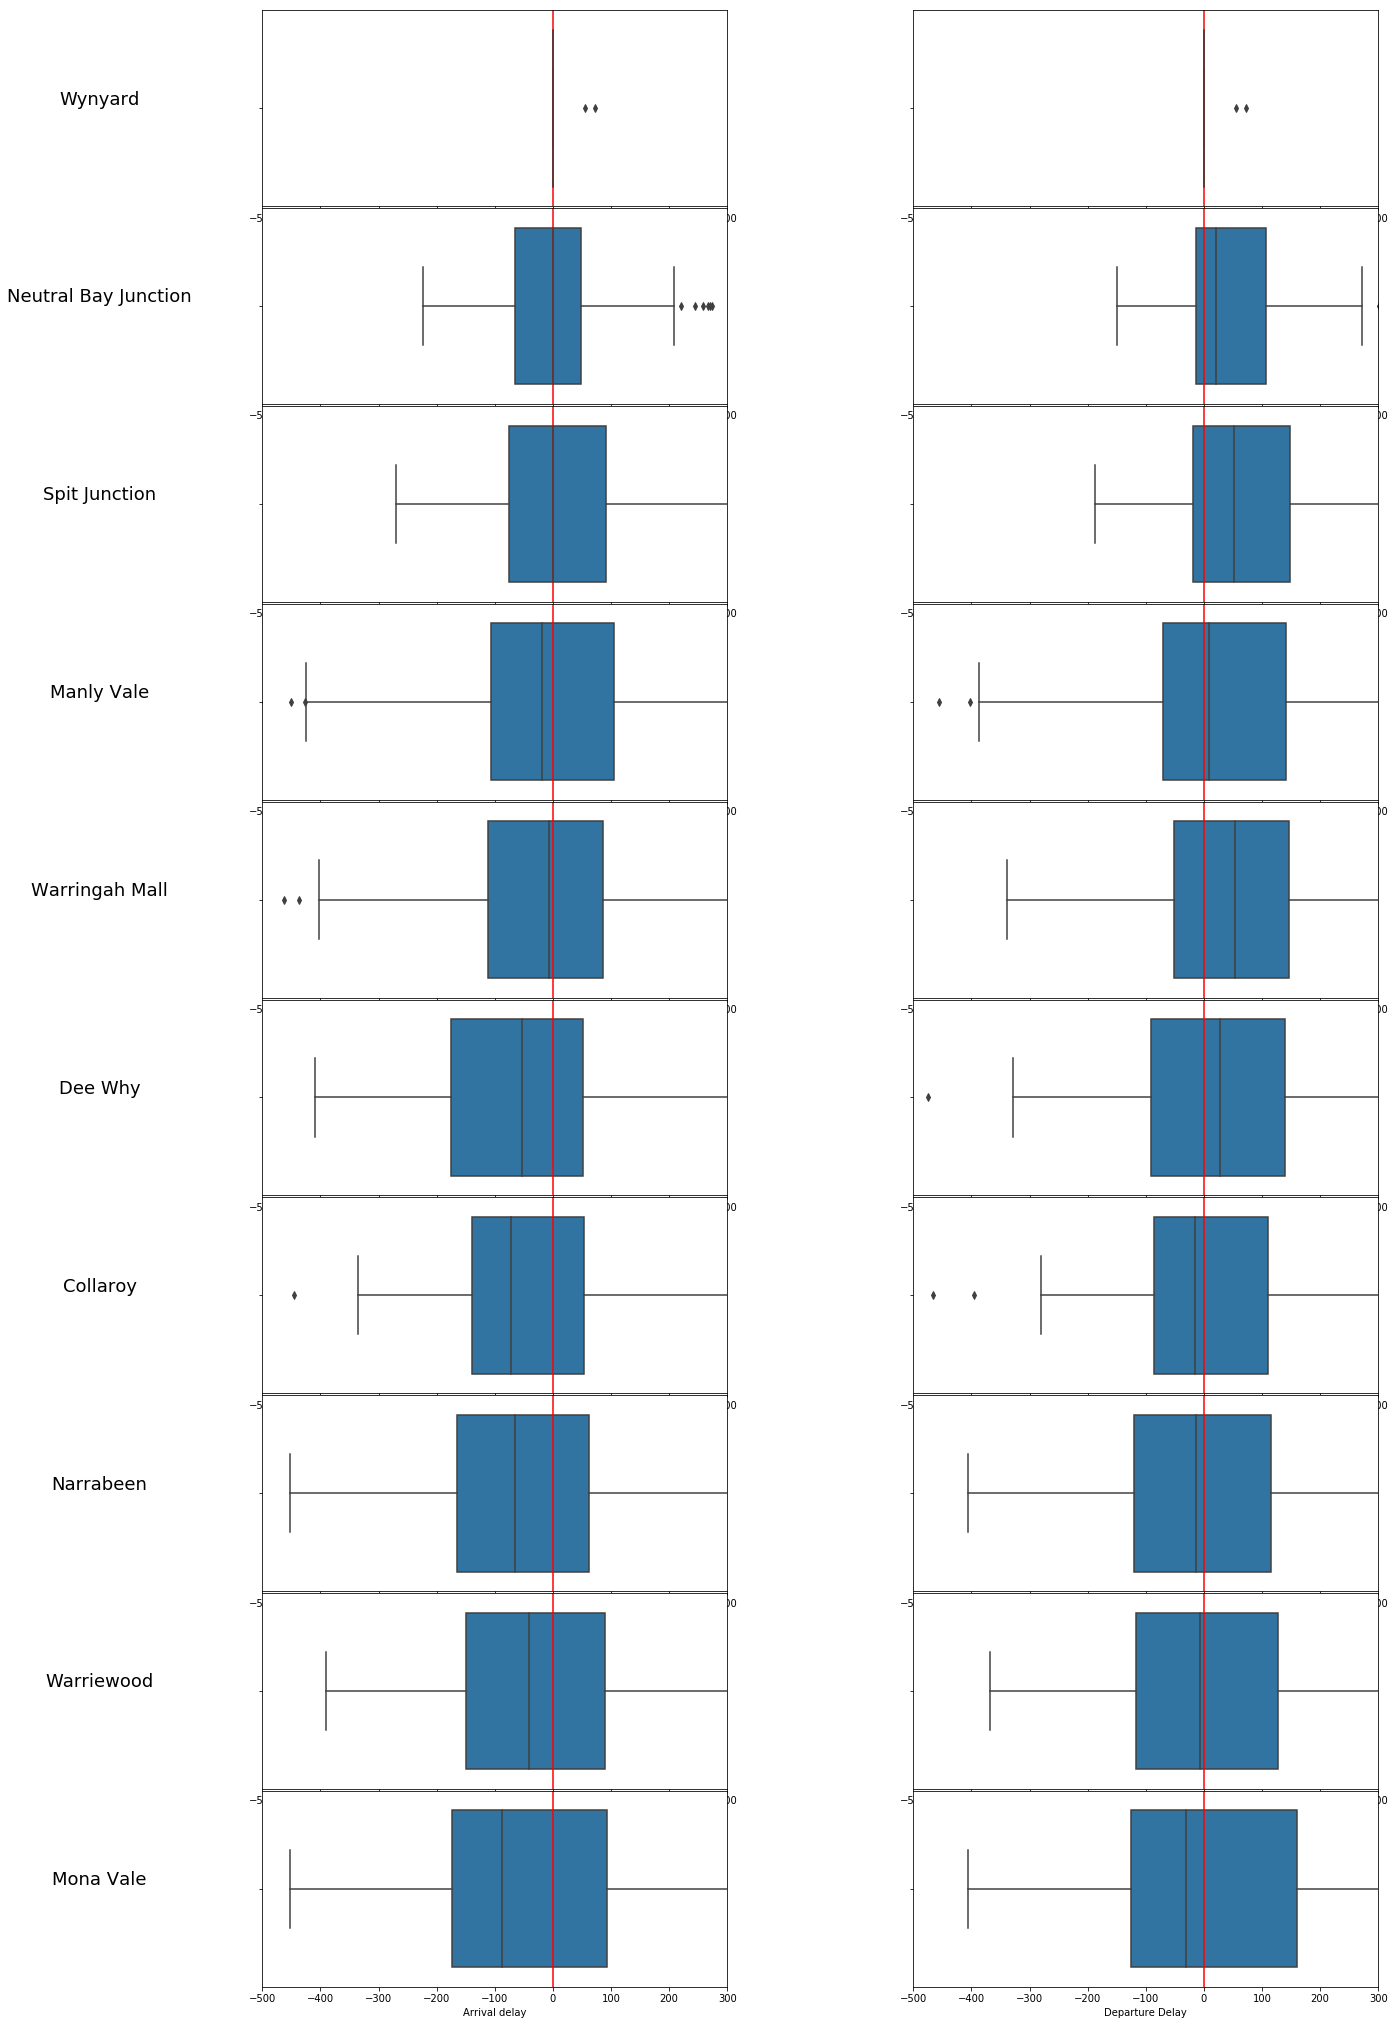

In [127]:
  
row = len(data['stop_id'].unique())+1
col = 2

fig = plt.figure(figsize=(20,40))
fig.subplots_adjust(hspace=0.01, wspace=0.4)
    
for idx, stop_id in enumerate(data['stop_id'].unique()):
    stop_id = data['stop_id'][data['stop_name'] == stop_order[idx]].iloc[0]
    ax = fig.add_subplot(row, col, idx*2+1)
    stop_data = data[data['stop_id'] == stop_id]
    sns.boxplot(stop_data['stop_arrival_delay'])
    ax.axvline(x=0,color='red')
    h = ax.set_ylabel(stop_data.iloc[0]['stop_name'],fontsize=18)
    h.set_rotation(0)
    ax.set_xlabel('Arrival delay')
    ax.set_xlim(-500,300)
    ax.yaxis.set_label_coords(-0.35,.50)
    

#     if (idx == 0):
#         ax.title.set_text('Arrival Delay')

    ax = fig.add_subplot(row, col, idx*2+2)
    sns.boxplot(stop_data['stop_departure_delay'])
    ax.axvline(x=0,color='red')
    ax.set_xlabel('Departure Delay')
    ax.set_xlim(-500,300)    

#     if (idx == 0):
#         ax.set_title('Departure Delay')
    


As you can see, there is significant variation in the delay times, ranging from 3 min early up to 3 min late.

The bus will be between 3 min early and 3 min late, with 95% confidence. Each stop will have a slightly more precise range describing the delay.

# Average Delay per hour (Northbound, all stops)

In [128]:


# data['Time'] = 0
# for i in range(data.shape[0]):

#     data['Time'].iloc[i] = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(data.iloc[i]['timestamp']))

# data['hour'] = pd.to_datetime(data['Time']).dt.hour
# data.to_csv('bus_data.csv')
# #data.head(30)

In [129]:
data = pd.read_csv('bus_data.csv',index_col='Unnamed: 0')
data.head()

,trip_id,start_time,start_date,schedule_relationship,route_id,stop_sequence,stop_arrival_delay,stop_arrival_time,stop_departure_delay,stop_departure_time,stop_id,timestamp,stop_name,stop_lat,stop_lon,wheelchair_boarding,Time,hour
0,595358,00:07:00,20190601,0.0,2440_B1,1.0,0.0,1.559312e+09,0.0,1.559312e+09,200023,1.559311e+09,Wynyard,-33.865836,151.206298,0,2019-06-01 00:02:12,0
1,595358,00:07:00,20190601,0.0,2440_B1,2.0,-28.0,1.559312e+09,21.0,1.559312e+09,208948,1.559312e+09,Neutral Bay Junction,-33.831205,151.221720,0,2019-06-01 00:12:05,0
2,595358,00:07:00,20190601,0.0,2440_B1,3.0,-37.0,1.559312e+09,-3.0,1.559312e+09,2088180,1.559312e+09,Spit Junction,-33.824006,151.241476,0,2019-06-01 00:12:05,0
3,595358,00:07:00,20190601,0.0,2440_B1,4.0,-30.0,1.559313e+09,4.0,1.559313e+09,209326,1.559313e+09,Manly Vale,-33.786134,151.266627,0,2019-06-01 00:22:03,0
4,595358,00:07:00,20190601,0.0,2440_B1,5.0,-16.0,1.559313e+09,32.0,1.559313e+09,210012,1.559313e+09,Warringah Mall,-33.767105,151.268702,0,2019-06-01 00:22:03,0


In [130]:
# df = pd.DataFrame(data.groupby(by='hour')['stop_arrival_delay'].mean()).reset_index()
# df.head()

In [131]:
# fig = plt.figure(figsize=(14,10))
# sns.barplot(x='hour',y='stop_arrival_delay',data=df)
# plt.title('Average Arrival delay (All stops)',fontsize=18)
# plt.ylabel('delay (sec)')
# plt.xlabel('Hour');


In [132]:
# df = pd.DataFrame(data.groupby(by='hour')['stop_departure_delay'].mean()).reset_index()
# df.head()

In [133]:
# fig = plt.figure(figsize=(14,10))
# sns.barplot(x='hour',y='stop_departure_delay',data=df)
# plt.title('Average Departure delay (All stops)',fontsize=18)
# plt.ylabel('delay (sec)')
# plt.xlabel('Hour');


# Mapping


In [134]:
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

crs = {'inti': 'epsg:4326'}

In [135]:
# set the filepath and load in a shapefile
fp = 'Australia_admin_6.shp'

councils = ['Council of the City of Sydney','Northern Beaches Council','Mosman Municipal Council','North Sydney Council']

map_df = gpd.read_file(fp)
map_df = map_df[map_df['name'].isin(councils) == True]


In [136]:
geometry = [Point(xy) for xy in zip(data['stop_lon'],data['stop_lat'])]


In [137]:
geo_df = gpd.GeoDataFrame(data,crs=crs,geometry=geometry)
geo_df.head()

,trip_id,start_time,start_date,schedule_relationship,route_id,stop_sequence,stop_arrival_delay,stop_arrival_time,stop_departure_delay,stop_departure_time,stop_id,timestamp,stop_name,stop_lat,stop_lon,wheelchair_boarding,Time,hour,geometry
0,595358,00:07:00,20190601,0.0,2440_B1,1.0,0.0,1.559312e+09,0.0,1.559312e+09,200023,1.559311e+09,Wynyard,-33.865836,151.206298,0,2019-06-01 00:02:12,0,POINT (151.206298 -33.865836)
1,595358,00:07:00,20190601,0.0,2440_B1,2.0,-28.0,1.559312e+09,21.0,1.559312e+09,208948,1.559312e+09,Neutral Bay Junction,-33.831205,151.221720,0,2019-06-01 00:12:05,0,POINT (151.22172 -33.831205)
2,595358,00:07:00,20190601,0.0,2440_B1,3.0,-37.0,1.559312e+09,-3.0,1.559312e+09,2088180,1.559312e+09,Spit Junction,-33.824006,151.241476,0,2019-06-01 00:12:05,0,POINT (151.241476 -33.824006)
3,595358,00:07:00,20190601,0.0,2440_B1,4.0,-30.0,1.559313e+09,4.0,1.559313e+09,209326,1.559313e+09,Manly Vale,-33.786134,151.266627,0,2019-06-01 00:22:03,0,POINT (151.266627 -33.786134)
4,595358,00:07:00,20190601,0.0,2440_B1,5.0,-16.0,1.559313e+09,32.0,1.559313e+09,210012,1.559313e+09,Warringah Mall,-33.767105,151.268702,0,2019-06-01 00:22:03,0,POINT (151.268702 -33.767105)


In [138]:
df = geo_df.groupby(by='stop_id')['stop_arrival_delay'].mean()
geo_arrival = pd.DataFrame(df).reset_index()
geo_arrival = geo_arrival.merge(stop_locations, on='stop_id')



df = geo_df.groupby(by='stop_id')['stop_departure_delay'].mean()
geo_departure = pd.DataFrame(df).reset_index()
geo_departure = geo_departure.merge(stop_locations, on='stop_id')


In [139]:
geometry = [Point(xy) for xy in zip(geo_arrival['stop_lon'],geo_arrival['stop_lat'])]
geo_arrival = gpd.GeoDataFrame(geo_arrival,crs=crs,geometry=geometry)
geo_arrival['geometry'] = geo_arrival['geometry'].translate(xoff=-0.005)
geo_arrival.head()

,stop_id,stop_arrival_delay,stop_name,stop_lat,stop_lon,wheelchair_boarding,geometry
0,200023,0.962687,Wynyard,-33.865836,151.206298,0,POINT (151.201298 -33.865836)
1,208948,2.162963,Neutral Bay Junction,-33.831205,151.221720,0,POINT (151.21672 -33.831205)
2,209326,-31.837037,Manly Vale,-33.786134,151.266627,0,POINT (151.261627 -33.786134)
3,209717,-49.385246,Collaroy,-33.731679,151.300906,0,POINT (151.295906 -33.731679)
4,209913,-55.948148,Dee Why,-33.752637,151.286507,0,POINT (151.281507 -33.752637)


In [140]:
geometry = [Point(xy) for xy in zip(geo_departure['stop_lon'],geo_departure['stop_lat'])]
geo_departure = gpd.GeoDataFrame(geo_departure,crs=crs,geometry=geometry)
geo_departure['geometry'] = geo_departure['geometry'].translate(xoff=0.005)
geo_departure.head()

,stop_id,stop_departure_delay,stop_name,stop_lat,stop_lon,wheelchair_boarding,geometry
0,200023,0.962687,Wynyard,-33.865836,151.206298,0,POINT (151.211298 -33.865836)
1,208948,51.837037,Neutral Bay Junction,-33.831205,151.221720,0,POINT (151.22672 -33.831205)
2,209326,10.740741,Manly Vale,-33.786134,151.266627,0,POINT (151.271627 -33.786134)
3,209717,5.327869,Collaroy,-33.731679,151.300906,0,POINT (151.305906 -33.731679)
4,209913,31.844444,Dee Why,-33.752637,151.286507,0,POINT (151.291507 -33.752637)


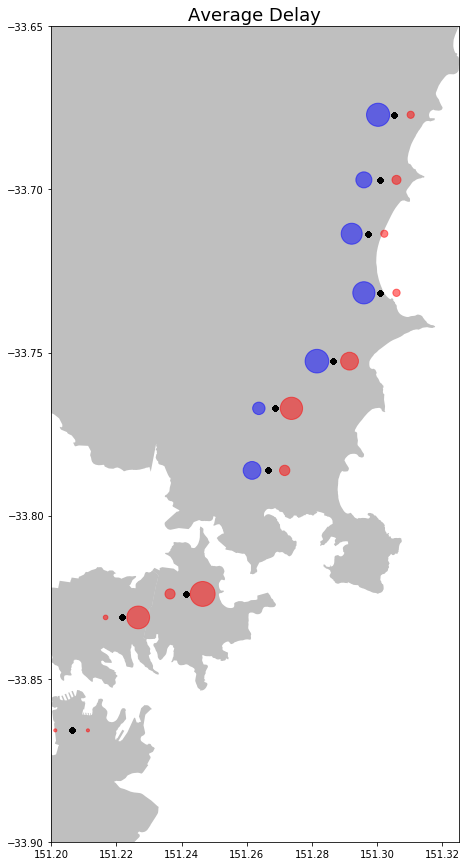

In [141]:
fig, ax = plt.subplots(figsize=(15,15)) 
map_df.plot(ax=ax, alpha=0.5,color='grey')
ax.set_xlim(151.2,151.325)
ax.set_ylim(-33.9,-33.65)

# Show stops
geo_df.plot(ax=ax, markersize=20,marker="o",color="black", alpha=0.5)

#ax.invert_yaxis()
pos = geo_arrival[geo_arrival['stop_arrival_delay'] >= 0]
neg = geo_arrival[geo_arrival['stop_arrival_delay'] < 0]

pos.plot(ax=ax, markersize=pos['stop_arrival_delay']*10,marker="o",color="red", alpha=0.5)
neg.plot(ax=ax, markersize=neg['stop_arrival_delay'].abs()*10,marker="o",color="blue", alpha=0.5)

pos = geo_departure[geo_departure['stop_departure_delay'] >= 0]
neg = geo_departure[geo_departure['stop_departure_delay'] < 0]

pos.plot(ax=ax, markersize=pos['stop_departure_delay']*10,marker="o",color="red", alpha=0.5)
neg.plot(ax=ax, markersize=neg['stop_departure_delay'].abs()*10,marker="o",color="blue", alpha=0.5)

plt.title('Average Delay',fontsize=18);

# Delay per hour


In [142]:
df = pd.DataFrame(data.groupby(by='hour')['stop_arrival_delay'].mean()).reset_index()
df2 = pd.DataFrame(data.groupby(by='hour')['stop_departure_delay'].mean()).reset_index()
df['stop_departure_delay'] = df2['stop_departure_delay']
df.columns = ['hour','Arrival delay','Departure delay']
df.head()


,hour,Arrival delay,Departure delay
0,0,-104.493976,-60.313253
1,1,-193.800000,-151.000000
2,5,-60.600000,-44.000000
3,6,-135.600000,-90.914286
4,7,-86.829268,-40.146341


In [143]:
hourly = pd.melt(df, id_vars="hour", var_name='type', value_name="delay")
#hourly.head(25)

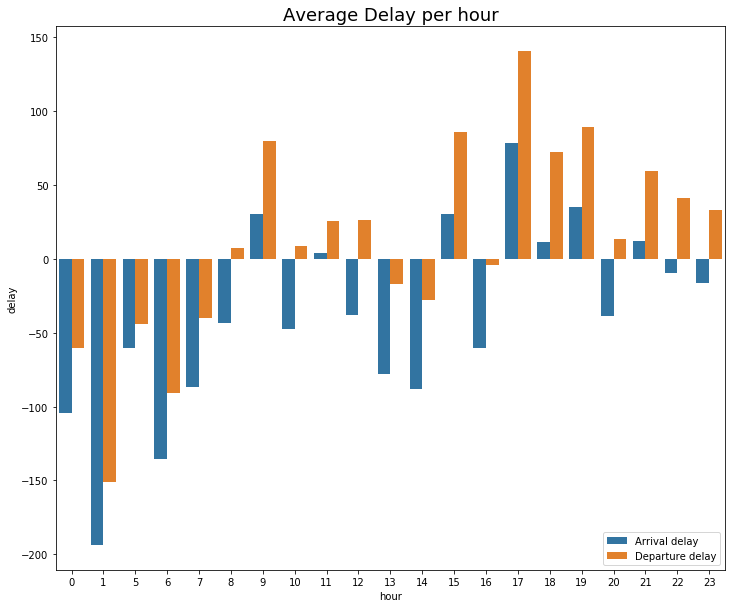

In [144]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x='hour', y='delay', hue='type', data=hourly,ax=ax)
plt.title('Average Delay per hour',fontsize=18)
plt.legend(loc='lower right');


On average the B1 bus arrives early each hour, but tends to depart late after morning peak times. There is significant delay in the afternoon, which may be due to people heading home from Vivid. The surrounding crowds will undoubtedly slow the buses departure from the city, which may have a significant contribution to the average delay later in the day. 

# Mapping hourly dealy

In [145]:
geo_df.head()

,trip_id,start_time,start_date,schedule_relationship,route_id,stop_sequence,stop_arrival_delay,stop_arrival_time,stop_departure_delay,stop_departure_time,stop_id,timestamp,stop_name,stop_lat,stop_lon,wheelchair_boarding,Time,hour,geometry
0,595358,00:07:00,20190601,0.0,2440_B1,1.0,0.0,1.559312e+09,0.0,1.559312e+09,200023,1.559311e+09,Wynyard,-33.865836,151.206298,0,2019-06-01 00:02:12,0,POINT (151.206298 -33.865836)
1,595358,00:07:00,20190601,0.0,2440_B1,2.0,-28.0,1.559312e+09,21.0,1.559312e+09,208948,1.559312e+09,Neutral Bay Junction,-33.831205,151.221720,0,2019-06-01 00:12:05,0,POINT (151.22172 -33.831205)
2,595358,00:07:00,20190601,0.0,2440_B1,3.0,-37.0,1.559312e+09,-3.0,1.559312e+09,2088180,1.559312e+09,Spit Junction,-33.824006,151.241476,0,2019-06-01 00:12:05,0,POINT (151.241476 -33.824006)
3,595358,00:07:00,20190601,0.0,2440_B1,4.0,-30.0,1.559313e+09,4.0,1.559313e+09,209326,1.559313e+09,Manly Vale,-33.786134,151.266627,0,2019-06-01 00:22:03,0,POINT (151.266627 -33.786134)
4,595358,00:07:00,20190601,0.0,2440_B1,5.0,-16.0,1.559313e+09,32.0,1.559313e+09,210012,1.559313e+09,Warringah Mall,-33.767105,151.268702,0,2019-06-01 00:22:03,0,POINT (151.268702 -33.767105)


In [146]:
df = geo_df.groupby(by=['stop_id','hour'])['stop_arrival_delay'].mean()
geo_arrival = pd.DataFrame(df).reset_index()
geo_arrival = geo_arrival.merge(stop_locations, on='stop_id')

geo_arrival.head()


df = geo_df.groupby(by=['stop_id','hour'])['stop_departure_delay'].mean()
geo_departure = pd.DataFrame(df).reset_index()
geo_departure = geo_departure.merge(stop_locations, on='stop_id')


In [147]:
geometry = [Point(xy) for xy in zip(geo_arrival['stop_lon'],geo_arrival['stop_lat'])]
geo_arrival = gpd.GeoDataFrame(geo_arrival,crs=crs,geometry=geometry)
geo_arrival['geometry'] = geo_arrival['geometry'].translate(xoff=-0.005)
geo_arrival.head()

,stop_id,hour,stop_arrival_delay,stop_name,stop_lat,stop_lon,wheelchair_boarding,geometry
0,200023,0,32.25,Wynyard,-33.865836,151.206298,0,POINT (151.201298 -33.865836)
1,200023,5,0.00,Wynyard,-33.865836,151.206298,0,POINT (151.201298 -33.865836)
2,200023,6,0.00,Wynyard,-33.865836,151.206298,0,POINT (151.201298 -33.865836)
3,200023,7,0.00,Wynyard,-33.865836,151.206298,0,POINT (151.201298 -33.865836)
4,200023,8,0.00,Wynyard,-33.865836,151.206298,0,POINT (151.201298 -33.865836)


In [148]:
geometry = [Point(xy) for xy in zip(geo_departure['stop_lon'],geo_departure['stop_lat'])]
geo_departure = gpd.GeoDataFrame(geo_departure,crs=crs,geometry=geometry)
geo_departure['geometry'] = geo_departure['geometry'].translate(xoff=0.005)
geo_departure.head()

,stop_id,hour,stop_departure_delay,stop_name,stop_lat,stop_lon,wheelchair_boarding,geometry
0,200023,0,32.25,Wynyard,-33.865836,151.206298,0,POINT (151.211298 -33.865836)
1,200023,5,0.00,Wynyard,-33.865836,151.206298,0,POINT (151.211298 -33.865836)
2,200023,6,0.00,Wynyard,-33.865836,151.206298,0,POINT (151.211298 -33.865836)
3,200023,7,0.00,Wynyard,-33.865836,151.206298,0,POINT (151.211298 -33.865836)
4,200023,8,0.00,Wynyard,-33.865836,151.206298,0,POINT (151.211298 -33.865836)


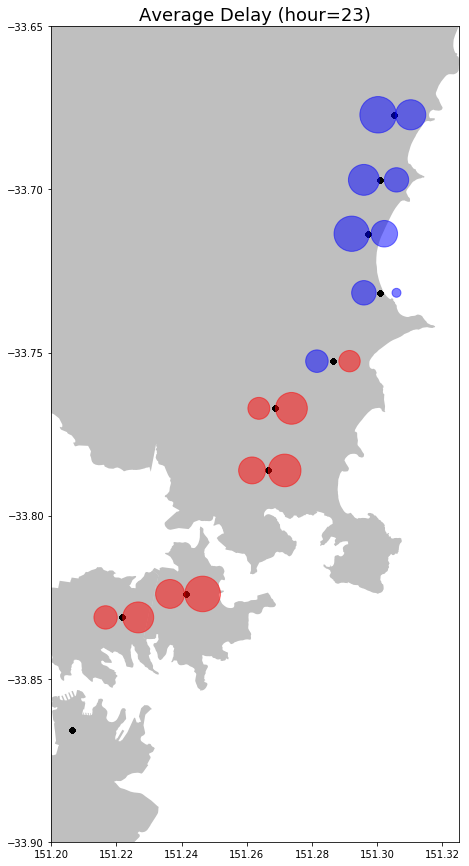

In [151]:


for i in range(240):
    
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(15,15)) 

    map_df.plot(ax=ax, alpha=0.5,color='grey')
    ax.set_xlim(151.2,151.325)
    ax.set_ylim(-33.9,-33.65)
    plt.title('Average Delay (hour={})'.format(i%24),fontsize=18)

    # Show stops
    geo_df.plot(ax=ax, markersize=20,marker="o",color="black", alpha=0.5)

    arrival = geo_arrival[geo_arrival['hour'] == i%24]
    pos = arrival[arrival['stop_arrival_delay'] >= 0]
    neg = arrival[arrival['stop_arrival_delay'] < 0]

    pos.plot(ax=ax, markersize=pos['stop_arrival_delay']*10,marker="o",color="red", alpha=0.5)
    neg.plot(ax=ax, markersize=neg['stop_arrival_delay'].abs()*10,marker="o",color="blue", alpha=0.5)


    departure = geo_departure[geo_departure['hour'] == i%24]
    pos = departure[departure['stop_departure_delay'] >= 0]
    neg = departure[departure['stop_departure_delay'] < 0]

    pos.plot(ax=ax, markersize=pos['stop_departure_delay']*10,marker="o",color="red", alpha=0.5)
    neg.plot(ax=ax, markersize=neg['stop_departure_delay'].abs()*10,marker="o",color="blue", alpha=0.5);
    plt.show()
    time.sleep(1)
    

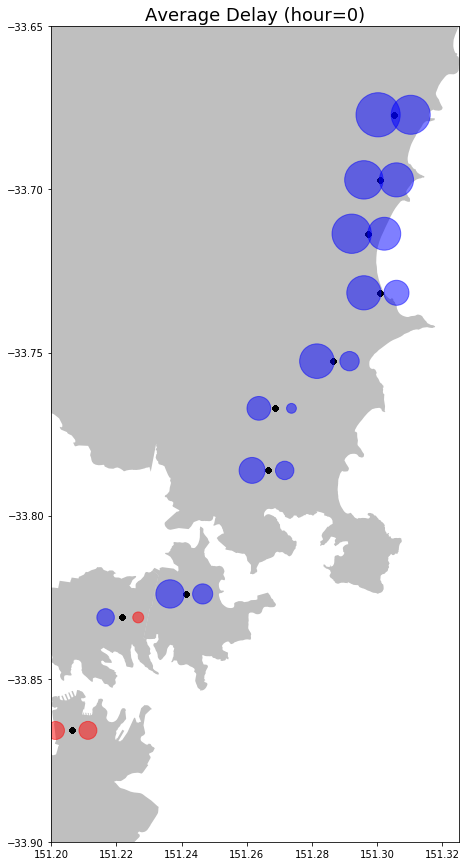

In [150]:
i = 0
clear_output(wait=True)
fig, ax = plt.subplots(figsize=(15,15)) 
ax.set_xlim(151.2,151.325)
ax.set_ylim(-33.9,-33.65)
    
map_df.plot(ax=ax, alpha=0.5,color='grey')
plt.title('Average Delay (hour={})'.format(i%24),fontsize=18)

# Show stops
geo_df.plot(ax=ax, markersize=20,marker="o",color="black", alpha=0.5)

arrival = geo_arrival[geo_arrival['hour'] == i%24]
pos = arrival[arrival['stop_arrival_delay'] >= 0]
neg = arrival[arrival['stop_arrival_delay'] < 0]

pos.plot(ax=ax, markersize=pos['stop_arrival_delay']*10,marker="o",color="red", alpha=0.5)
neg.plot(ax=ax, markersize=neg['stop_arrival_delay'].abs()*10,marker="o",color="blue", alpha=0.5)


departure = geo_departure[geo_departure['hour'] == i%24]
pos = departure[departure['stop_departure_delay'] >= 0]
neg = departure[departure['stop_departure_delay'] < 0]

pos.plot(ax=ax, markersize=pos['stop_departure_delay']*10,marker="o",color="red", alpha=0.5)
neg.plot(ax=ax, markersize=neg['stop_departure_delay'].abs()*10,marker="o",color="blue", alpha=0.5);
plt.show()

